I will perform data analysis on two types of rider data from Uber. The first dataset contains information about the rides taken by one particular user, and the second contains similar details about the rides taken by Uber users in Boston.

Insight Generation

To perform a preliminary data analysis, I will follow specific steps to extract and understand the data visually:

1) Identify a feature to explore and find the unique values in that column

2) Handle NaN or NULL values.

3) Plot a bar graph or histogram of the column data based on the data type.

4) Identify outliers and peculiar trends and provide explanations for these trends by relating them to the real world.

5) After this process, we will better understand the story our limited data is trying to tell. This will make the decision-making process for solving a business problem well-informed and smooth.

In [192]:
import pandas as pd
import numpy as np
import time,datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [193]:
uber_data = pd.read_csv('data/My Uber Drives - 2016.csv')

In [194]:
uber_data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [195]:
uber_data = uber_data.rename(columns = {uber_data.columns[0]:'START_DATE',
                                        uber_data.columns[1]:'END_DATE',
                                        uber_data.columns[2]:'CATEGORY',
                                        uber_data.columns[3]:'START',
                                        uber_data.columns[4]:'STOP',
                                        uber_data.columns[5]: 'MILES',
                                        uber_data.columns[6]:'PURPOSE'})

In [196]:
print(uber_data.isnull().sum())
print(uber_data.isnull().sum().sum())

uber_data=uber_data.dropna()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64
507


In [197]:
uber_data[uber_data['START'].str.contains("\\?") == True]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
140,2/20/2016 14:50,2/20/2016 15:54,Business,R?walpindi,R?walpindi,23.1,Meeting
1119,12/27/2016 7:02,12/27/2016 7:14,Business,Kar?chi,Kar?chi,4.9,Temporary Site
1120,12/27/2016 8:37,12/27/2016 8:59,Business,Kar?chi,Kar?chi,5.0,Meal/Entertain
1121,12/27/2016 12:53,12/27/2016 12:57,Business,Kar?chi,Kar?chi,0.6,Meal/Entertain
1122,12/27/2016 14:49,12/27/2016 15:03,Business,Kar?chi,Unknown Location,3.1,Customer Visit
1124,12/27/2016 19:19,12/27/2016 19:50,Business,Kar?chi,Kar?chi,5.5,Customer Visit
1125,12/28/2016 8:34,12/28/2016 9:06,Business,Kar?chi,Unknown Location,10.3,Meal/Entertain
1127,12/28/2016 13:53,12/28/2016 14:01,Business,Kar?chi,Kar?chi,2.0,Errand/Supplies
1128,12/28/2016 15:04,12/28/2016 15:39,Business,Kar?chi,Unknown Location,8.5,Meal/Entertain
1130,12/28/2016 18:33,12/28/2016 18:56,Business,Kar?chi,Kar?chi,3.8,Errand/Supplies


In [198]:
uber_data['START'] = uber_data['START'].replace({"\\?":"a"}, regex = True)
uber_data['STOP'] = uber_data['STOP'].replace({"\\?":"a"}, regex = True)

In [199]:
uber_data['START_DATE'] = pd.to_datetime(uber_data['START_DATE'], format="%m/%d/%Y %H:%M")
uber_data['END_DATE'] = pd.to_datetime(uber_data['END_DATE'], format="%m/%d/%Y %H:%M")

uber_data['HOUR'] =  [x.hour for x in uber_data['START_DATE']]
uber_data['DAY'] =  [x.day for x in uber_data['START_DATE']]
uber_data['MONTH'] =  [x.month for x in uber_data['START_DATE']]
uber_data['WEEKDAY'] =  [calendar.day_name[x.dayofweek] for x in uber_data['START_DATE']]
uber_data['DAY_OF_WEEK'] =  [x.dayofweek for x in uber_data['START_DATE']]

In [200]:
uber_data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,HOUR,DAY,MONTH,WEEKDAY,DAY_OF_WEEK
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,1,Friday,4
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,1,Saturday,5
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,Tuesday,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,1,Wednesday,2
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,1,Wednesday,2


Let’s see what the “category” column looks like using the countplot() method of seaborn. This method will count the frequency of every unique value in the column and plot a bar graph.

<Axes: xlabel='CATEGORY', ylabel='count'>

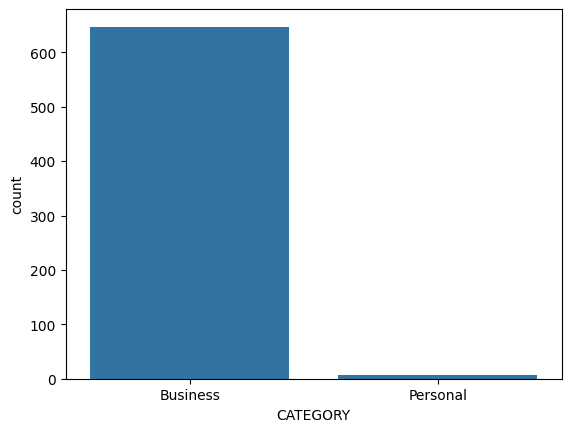

In [201]:
sns.countplot(x='CATEGORY', data=uber_data)

Similarly, for “purpose”:

<Axes: xlabel='count', ylabel='PURPOSE'>

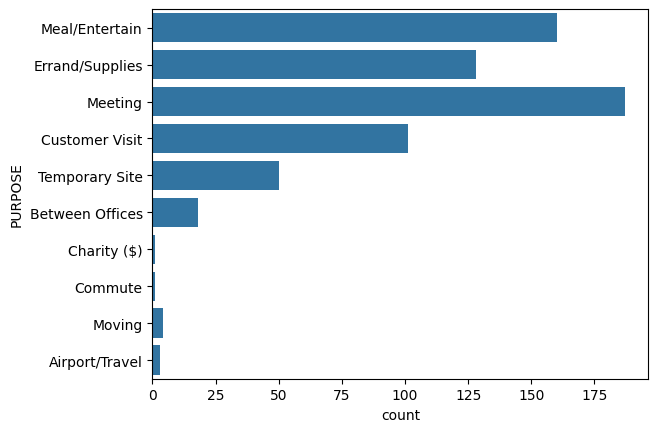

In [202]:
sns.countplot(y='PURPOSE', data=uber_data)

Using these two graphs, it is clear that user most used Uber for work-related meetings and meals most of the time. Other significant purposes include errands and customer visits. We can presume that the user works in a client-oriented service industry that involves frequent traveling and dining with clients in the city.

Plotting the distance column as a histogram shows that the distances traveled by the user are relatively short, which validates our assumption about the user’s work-related travels.

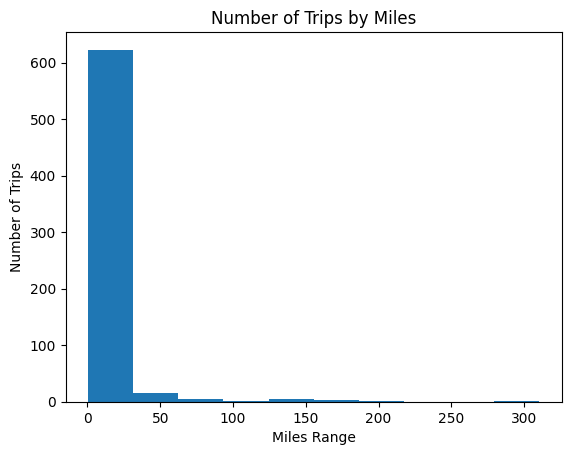

In [203]:
uber_data['MILES'].plot.hist()

plt.xlabel("Miles Range")
plt.ylabel("Number of Trips")

# setting y_label as price
plt.title("Number of Trips by Miles")
plt.show()

Next, let's see at what time of the day the user rides an Uber the most.

Text(0.5, 1.0, 'Number of trips Vs hours')

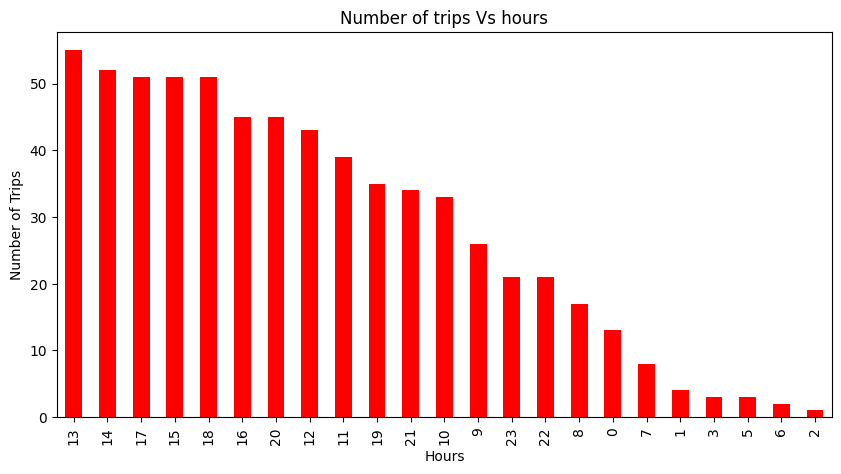

In [204]:
hours = uber_data['HOUR'].value_counts()
hours.plot(kind= 'bar', color= 'red', figsize= (10,5))
plt.xlabel( 'Hours' )
plt.ylabel( 'Number of Trips' )
plt.title( 'Number of trips Vs hours')

It is very apparent here that the user travels during lunch hours and in the early evenings more than the rest of the day. It might be, so that client visits or client lunches occur more frequently between 1 PM-5 PM than the rest of the day.

At a level above a single day, we can look at the user's travel patterns on different days of the week.

Text(0.5, 1.0, 'Number of trips Vs days')

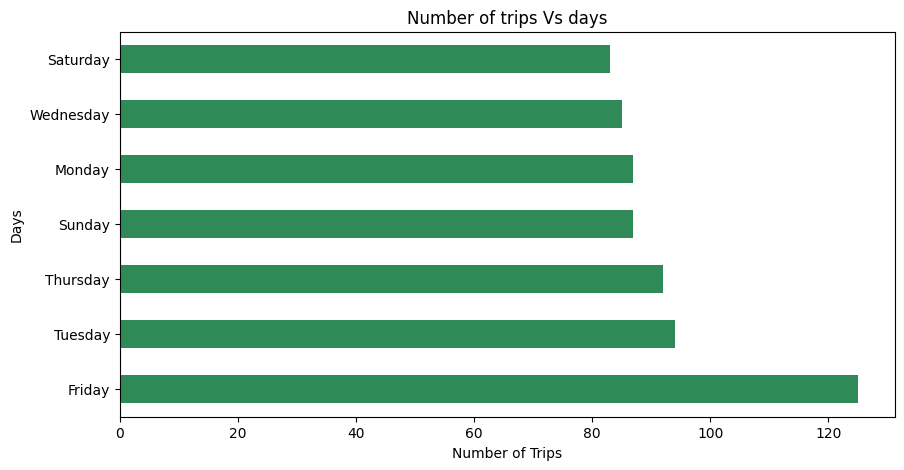

In [205]:
days = uber_data[ 'WEEKDAY' ].value_counts()
days.plot(kind='barh', color= 'seagreen', figsize=(10, 5) )
plt.xlabel('Number of Trips')
plt.ylabel('Days' )
plt.title( 'Number of trips Vs days')

While the user travels almost regularly each day of the week, he travels more on Fridays. Since we know he travels in the evenings too, we can assume that the additional number of trips on Fridays might be recreational.

Further, we can also look at the month-wise distribution of Uber trips.

Text(0.5, 1.0, 'Number of trips Vs Months')

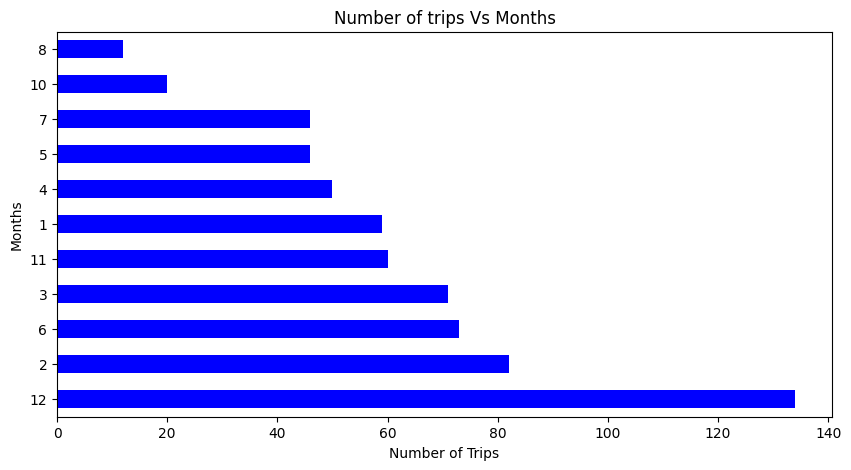

In [206]:
months = uber_data[ 'MONTH' ].value_counts()
months.plot(kind='barh', color= 'blue', figsize=(10, 5) )
plt.xlabel('Number of Trips')
plt.ylabel('Months' )
plt.title( 'Number of trips Vs Months')

We can point out how there were significantly more trips in December 2016 for this user while the rest of the months fall within a specific range.

Text(0.5, 1.0, 'Number of trips Vs days of december')

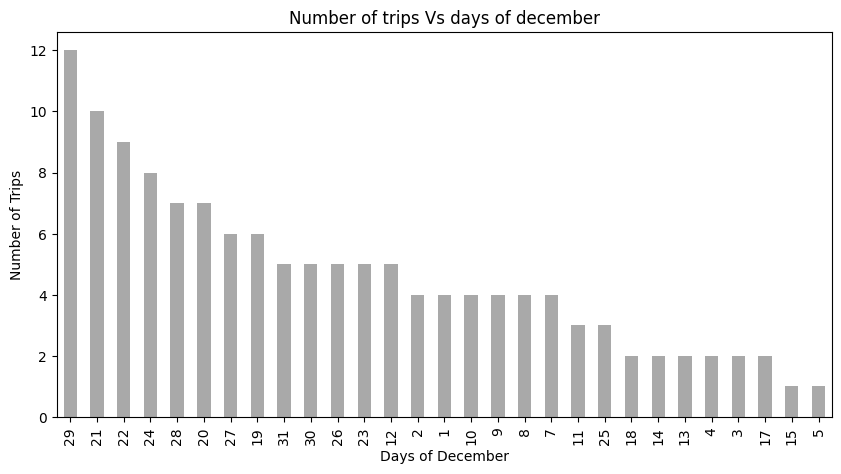

In [207]:
months = uber_data[ 'DAY' ][uber_data['MONTH']==12].value_counts()
months.plot(kind='bar', color= 'darkgray', figsize=(10, 5) )
plt.xlabel('Days of December')
plt.ylabel('Number of Trips' )
plt.title( 'Number of trips Vs days of december')

Let’s see where the user traveled to and from in an Uber.

Text(0.5, 1.0, 'Number of Trips by Pickup points')

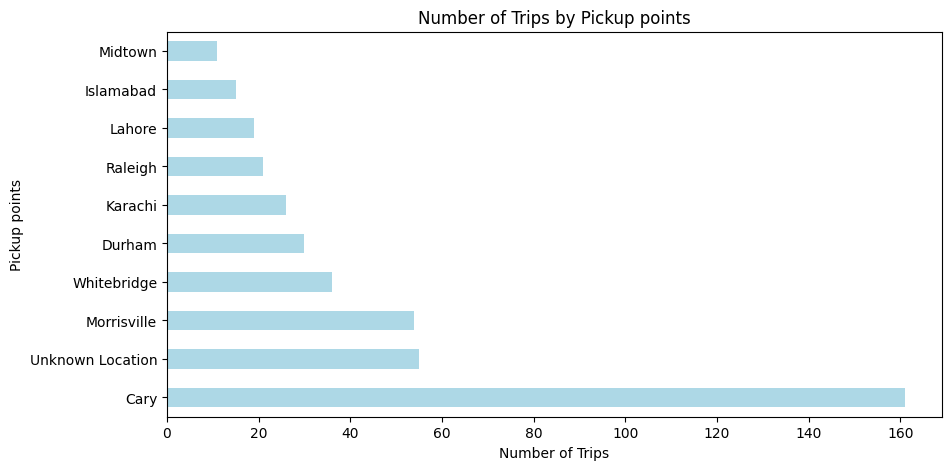

In [208]:
pic_point = uber_data[ 'START' ].value_counts().nlargest(10)
pic_point.plot(kind='barh', color= 'lightblue', figsize=(10, 5))
plt.xlabel('Number of Trips')
plt.ylabel('Pickup points' )
plt.title( 'Number of Trips by Pickup points')

The skewed number of trips start from Cary could mean that the user either resides or works in this region.

Similarly, let’s also look at the destination of these trips.

Text(0.5, 1.0, 'Number of Trips by Drop points')

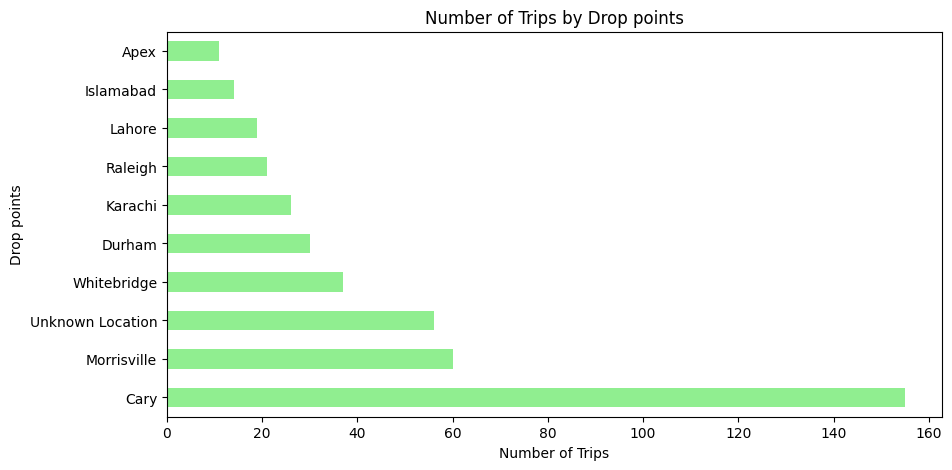

In [209]:
drop_point = uber_data[ 'STOP' ].value_counts().nlargest(10)
drop_point.plot(kind='barh', color= 'lightgreen', figsize=(10, 5))
plt.xlabel('Number of Trips')
plt.ylabel('Drop points' )
plt.title( 'Number of Trips by Drop points')

An interesting observation is how most of these places are the same as the pick-up points. This confirms the intuition that the user usually commutes around Cary or Morrisville.

However, we can still check how often the user takes particular “trips” from location A to B.

Text(0.5, 1.0, 'points - points Trips Counts')

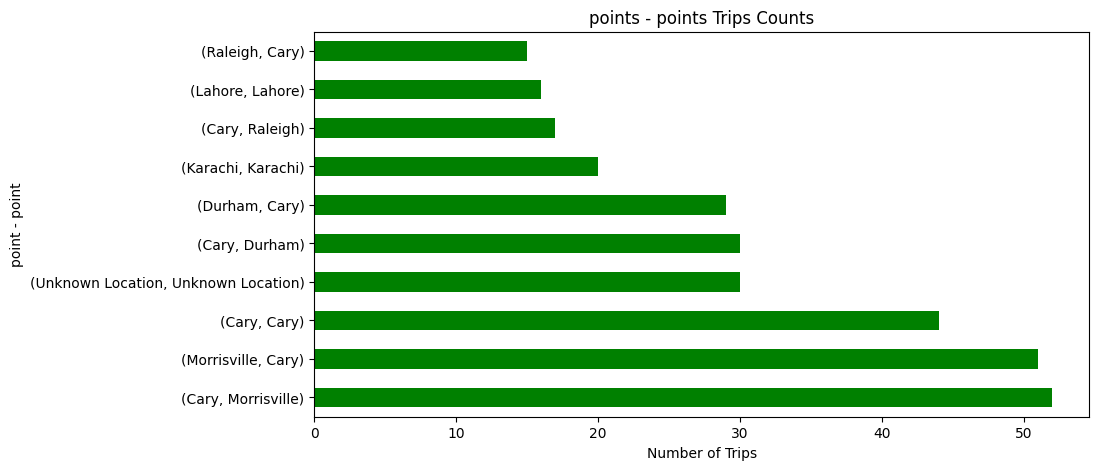

In [210]:
p_p = uber_data[[ 'START', 'STOP'] ].value_counts().nlargest(10)
p_p.plot(kind='barh', color= 'green', figsize=(10, 5))
plt.xlabel('Number of Trips')
plt.ylabel('point - point' )
plt.title( 'points - points Trips Counts')

As assumed, the user travels very frequently between Cary and Morrisville.

In [211]:
print("\n..........Average Length of the Trip..............\n")
print('Business:', round(uber_data[uber_data['CATEGORY'] == 'Business'].MILES.mean(), 3))
print('Personal:', round(uber_data[uber_data['CATEGORY'] == 'Personal'].MILES.mean(), 3))
print('Meal/Entertain:', round(uber_data[uber_data['PURPOSE'] == 'Meal/Entertain'].MILES.mean(), 3))


..........Average Length of the Trip..............

Business: 10.97
Personal: 35.583
Meal/Entertain: 5.698


Now, let's see rides in Boston in terms of all users.

In [212]:
data2 = pd.read_csv('data/rideshare_kaggle.csv' )

In [213]:
data2.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [214]:
extra_cols = [ 'apparentTemperature', 'precipIntensity' ,
'humidity',
'windSpeed',
'apparentTemperatureHigh',
'dewPoint',
'precipIntensityMax',
'apparentTemperatureMax',
'cloudCover',
'moonPhase',
'windGustTime',
'visibility',
'temperatureHighTime' ,
'apparentTemperatureHighTime',
'apparentTemperatureLow' ,
'apparentTemperatureLowTime',
'temperatureMinTime' ,
'temperatureMaxTime',
'apparentTemperatureMin',
'apparentTemperatureMinTime', 'apparentTemperatureMaxTime',
'windBearing' ,
'sunriseTime',
'uvIndex' ,
'visibility.1', 
'ozone',
'sunsetTime', 'uvIndexTime']

data2 = data2.drop(extra_cols, axis=1)

In [215]:
data2.sample(10)


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,long_summary,precipProbability,windGust,temperatureHigh,temperatureLow,temperatureLowTime,icon,pressure,temperatureMin,temperatureMax
353510,cdee21d0-cdd1-48e1-a1ab-d37ea23cf339,1.543851e+09,15,3,12,2018-12-03 15:27:58,America/New_York,Back Bay,Boston University,Uber,...,Foggy in the morning.,0.00,5.87,57.04,33.72,1543921200,partly-cloudy-day,999.80,42.91,57.04
232930,44bc6b09-028e-4f07-9f12-780408ef67a1,1.545107e+09,4,18,12,2018-12-18 04:30:04,America/New_York,North End,Beacon Hill,Uber,...,Light rain in the morning.,0.00,11.31,41.42,23.89,1545138000,cloudy,1000.92,34.07,41.42
41254,1bfa9485-8abf-4dbe-a526-a2e6a59a6e06,1.543836e+09,11,3,12,2018-12-03 11:17:59,America/New_York,Beacon Hill,Haymarket Square,Lyft,...,Foggy in the morning.,0.00,4.54,57.08,33.68,1543921200,cloudy,1000.30,42.86,57.08
164784,eaab98ac-688c-44ce-9193-116c07d9ad33,1.543618e+09,22,30,11,2018-11-30 22:43:06,America/New_York,Boston University,Financial District,Uber,...,Mostly cloudy throughout the day.,0.00,3.99,42.52,31.71,1543658400,cloudy,1017.16,28.79,42.52
200527,dd609178-814e-439d-b6f8-90cd5b709dea,1.543312e+09,9,27,11,2018-11-27 09:45:22,America/New_York,Financial District,South Station,Lyft,...,Light rain in the morning.,1.00,15.23,46.91,33.82,1543399200,rain,991.89,36.34,46.91
312660,d6ec568d-297c-4a51-b028-3e26d7a7397b,1.543482e+09,8,29,11,2018-11-29 08:58:00,America/New_York,Theatre District,South Station,Lyft,...,Partly cloudy throughout the day.,0.00,16.24,44.96,28.42,1543579200,partly-cloudy-night,1000.98,35.20,44.96
335014,f2338f95-07b7-4a14-ac24-6451c8b62ddd,1.544927e+09,2,16,12,2018-12-16 02:20:12,America/New_York,Boston University,North Station,Uber,...,Mostly cloudy throughout the day.,0.00,5.77,54.29,38.48,1544954400,partly-cloudy-night,1024.46,39.74,54.29
80882,1f343c85-a7c0-48af-8ae1-68b09ece08e2,1.543238e+09,13,26,11,2018-11-26 13:14:10,America/New_York,Back Bay,Boston University,Uber,...,"Rain until morning, starting again in the eve...",0.09,3.49,46.50,41.82,1543298400,cloudy,1014.88,40.39,46.50
54327,f5dcebe5-9ec6-4da7-9fbe-0dc51ea649b4,1.544975e+09,15,16,12,2018-12-16 15:40:05,America/New_York,Back Bay,Boston University,Uber,...,Rain throughout the day.,0.00,8.19,43.83,34.25,1545044400,cloudy,1020.18,39.22,43.83
60312,0ab193d2-e7f1-42fc-b801-a6469714e4ea,1.543786e+09,21,2,12,2018-12-02 21:27:57,America/New_York,Northeastern University,Financial District,Uber,...,Rain throughout the day.,0.46,4.34,52.86,46.60,1543824000,rain,1003.15,36.35,52.86


In [216]:
print(data2.isnull().sum())
print(data2.isnull().sum().sum())
data2=data2.dropna()

id                        0
timestamp                 0
hour                      0
day                       0
month                     0
datetime                  0
timezone                  0
source                    0
destination               0
cab_type                  0
product_id                0
name                      0
price                 55095
distance                  0
surge_multiplier          0
latitude                  0
longitude                 0
temperature               0
short_summary             0
long_summary              0
precipProbability         0
windGust                  0
temperatureHigh           0
temperatureLow            0
temperatureLowTime        0
icon                      0
pressure                  0
temperatureMin            0
temperatureMax            0
dtype: int64
55095


Text(0.5, 1.0, 'Number of trips Vs hours')

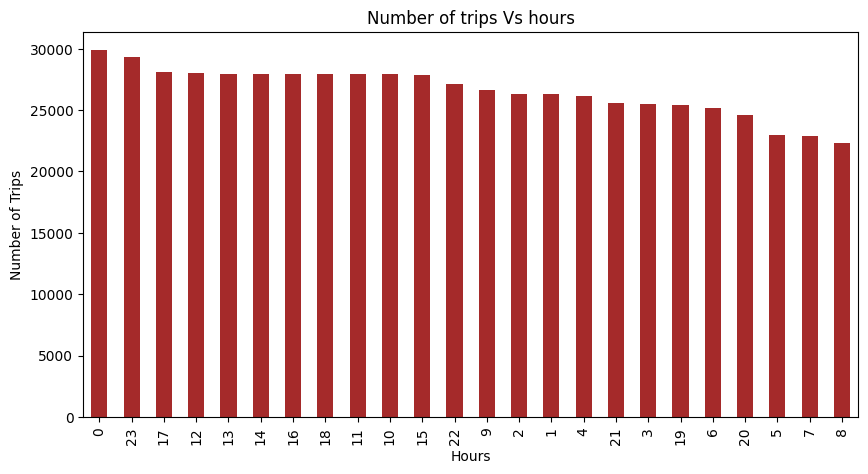

In [217]:
hours = data2['hour'].value_counts()
hours.plot(kind= 'bar', color= 'brown', figsize= (10,5))
plt.xlabel( 'Hours' )
plt.ylabel( 'Number of Trips' )
plt.title( 'Number of trips Vs hours')

In [218]:
day_week = [calendar.day_name[x.dayofweek] for x in pd.to_datetime(data2['datetime'], format= "%Y-%m-%d %H:%M:%S")]
day_week = pd.Series(day_week)

Text(0.5, 1.0, 'Number of trips Vs days')

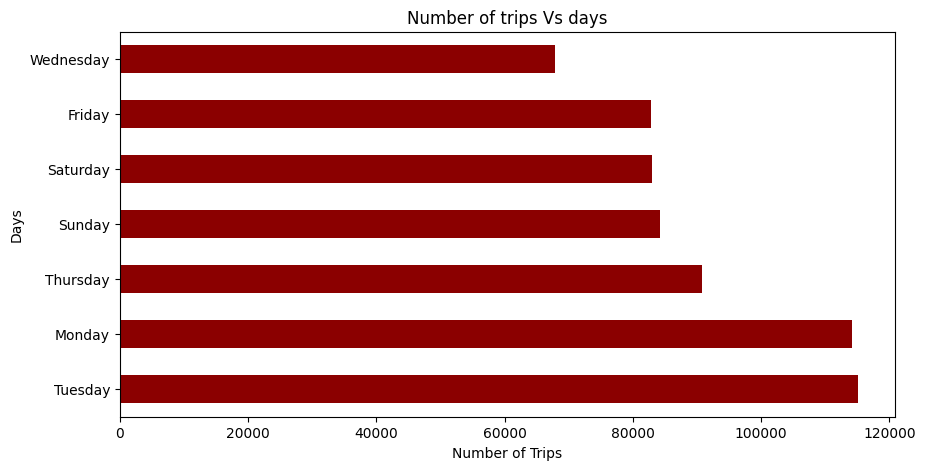

In [219]:
days = day_week.value_counts()
days.plot(kind='barh', color= 'darkred', figsize=(10, 5) )
plt.xlabel('Number of Trips')
plt.ylabel('Days' )
plt.title( 'Number of trips Vs days')

Text(0.5, 1.0, 'Number of trips Vs Months')

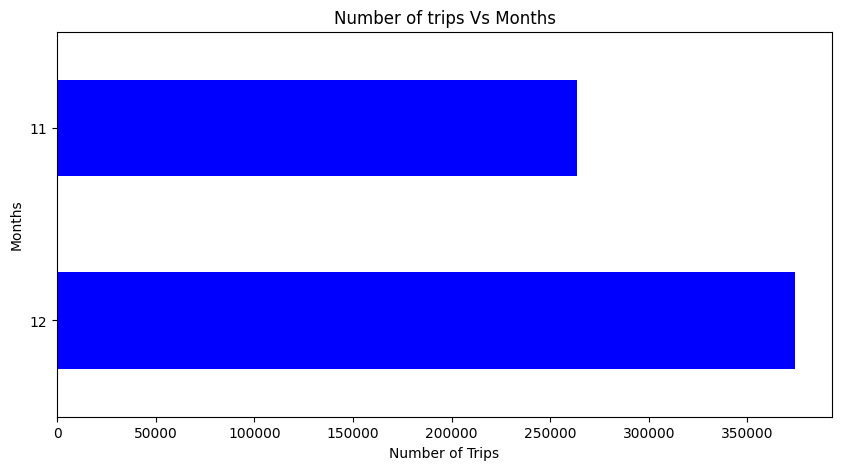

In [220]:
months = data2[ 'month' ].value_counts()
months.plot(kind='barh', color= 'blue', figsize=(10, 5) )
plt.xlabel('Number of Trips')
plt.ylabel('Months' )
plt.title( 'Number of trips Vs Months')

Text(0.5, 1.0, 'Number of trips Vs days of December')

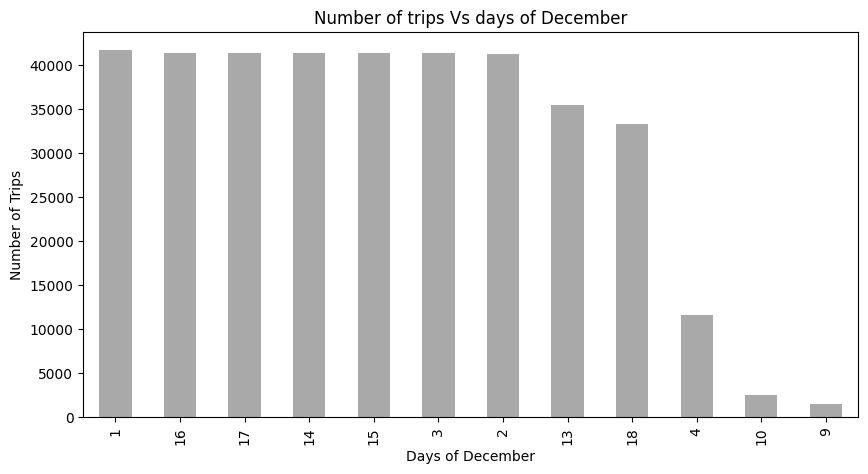

In [221]:
months = data2[ 'day' ][data2['month']==12].value_counts()
months.plot(kind='bar', color= 'darkgray', figsize=(10, 5) )
plt.xlabel('Days of December')
plt.ylabel('Number of Trips' )
plt.title( 'Number of trips Vs days of December')

Text(0.5, 1.0, 'Number of Trips by Pickup points')

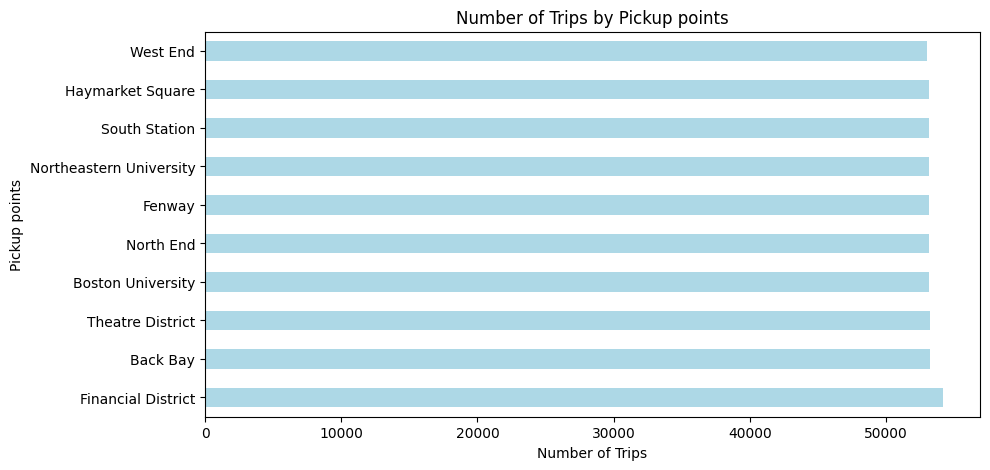

In [222]:
pic_point = data2[ 'source' ].value_counts().nlargest(10)
pic_point.plot(kind='barh', color= 'lightblue', figsize=(10, 5))
plt.xlabel('Number of Trips')
plt.ylabel('Pickup points' )
plt.title( 'Number of Trips by Pickup points')

Text(0.5, 1.0, 'Number of Trips by Drop points')

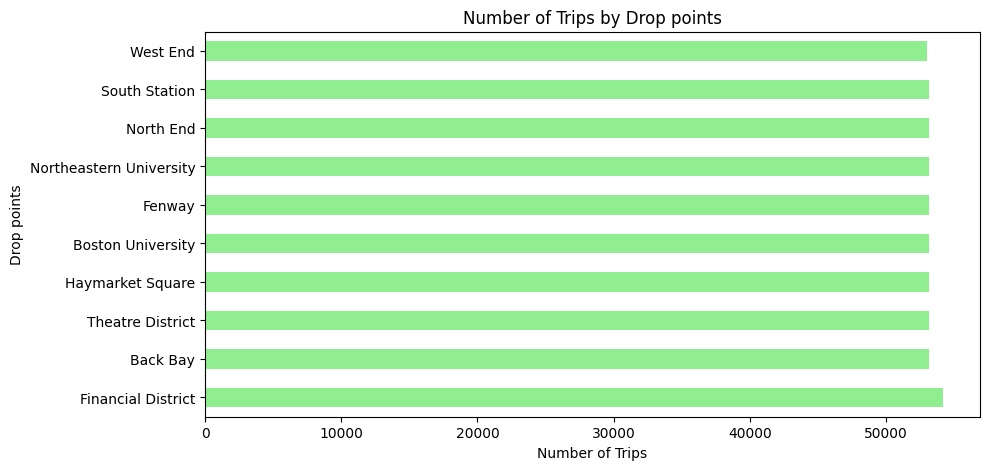

In [223]:
drop_point = data2[ 'destination' ].value_counts().nlargest(10)
drop_point.plot(kind='barh', color= 'lightgreen', figsize=(10, 5))
plt.xlabel('Number of Trips')
plt.ylabel('Drop points' )
plt.title( 'Number of Trips by Drop points')

Text(0.5, 1.0, 'points - points Trips Counts')

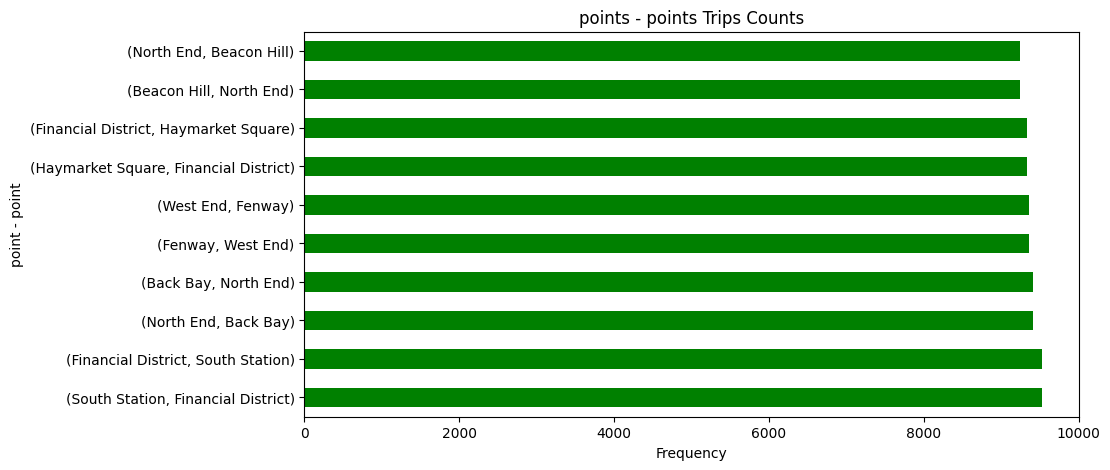

In [224]:
p_p = data2[[ 'source', 'destination'] ].value_counts().nlargest(10)
p_p.plot(kind='barh', color= 'green', figsize=(10, 5))
plt.xlabel('Frequency')
plt.ylabel('point - point' )
plt.title( 'points - points Trips Counts')

Text(0.5, 1.0, 'Number of Trips by Cabs Name ')

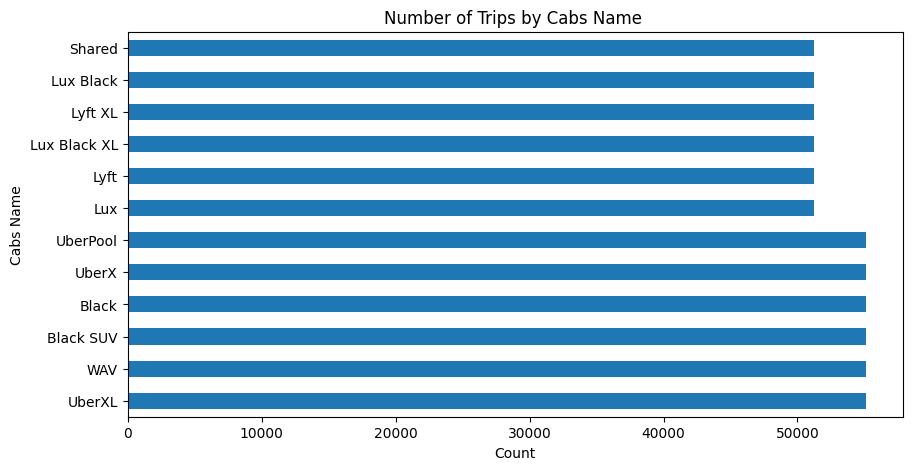

In [225]:
cabs = data2['name'].value_counts()
cabs.plot(kind='barh',figsize=(10, 5))
plt.xlabel('Count')
plt.ylabel('Cabs Name' )
plt.title( 'Number of Trips by Cabs Name ')

In [226]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [227]:
data2['id'] = label_encoder.fit_transform(data2['id'])
data2['datetime'] = label_encoder.fit_transform(data2['datetime'])
data2['timezone'] = label_encoder.fit_transform(data2['timezone'])
data2['destination'] = label_encoder.fit_transform(data2['destination'])
data2['product_id'] = label_encoder.fit_transform(data2['product_id'])
data2['short_summary'] = label_encoder.fit_transform(data2['short_summary'])
data2['long_summary'] = label_encoder.fit_transform(data2['long_summary'])
data2['name'] = label_encoder.fit_transform(data2['name'])

In [228]:
print("Class mapping of Name: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Name: 
Black --> 0
Black SUV --> 1
Lux --> 2
Lux Black --> 3
Lux Black XL --> 4
Lyft --> 5
Lyft XL --> 6
Shared --> 7
UberPool --> 8
UberX --> 9
UberXL --> 10
WAV --> 11


In [229]:
data2['source'] = label_encoder.fit_transform(data2['source'])

print("Class mapping of Source: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Source: 
Back Bay --> 0
Beacon Hill --> 1
Boston University --> 2
Fenway --> 3
Financial District --> 4
Haymarket Square --> 5
North End --> 6
North Station --> 7
Northeastern University --> 8
South Station --> 9
Theatre District --> 10
West End --> 11


In [230]:
data2['icon'] = label_encoder.fit_transform(data2['icon'])

print("Class mapping of Icon: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Icon: 
 clear-day  --> 0
 clear-night  --> 1
 cloudy  --> 2
 fog  --> 3
 partly-cloudy-day  --> 4
 partly-cloudy-night  --> 5
 rain  --> 6


In [231]:
data2['cab_type'] = label_encoder.fit_transform(data2['cab_type'])

print("Class mapping of Cabe_type: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Cabe_type: 
Lyft --> 0
Uber --> 1


In [232]:
len(data2[data2['cab_type']==1])

330568

In [233]:
x = data2[data2['cab_type']==1].drop(['price', 'cab_type'], axis=1)
y = data2[data2['cab_type']==1]['price']

In [234]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

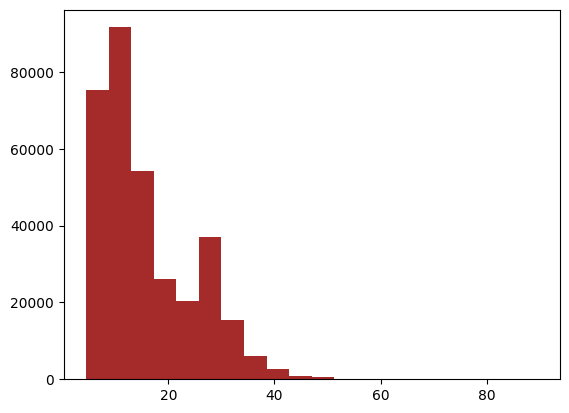

In [235]:
plt.hist(y, bins=20, color = 'brown')
plt.show()

In [236]:
from   sklearn.feature_selection   import   RFE
from   sklearn.linear_model   import   LinearRegression
from   sklearn.tree   import   DecisionTreeRegressor
from   sklearn.ensemble   import   RandomForestRegressor


from   sklearn   import  ensemble

In [237]:
def train_test_models(x_train, y_train, x_test, y_test):
    print("Linear Regression... ")
    lr_model = LinearRegression()
    lr_model = lr_model.fit(x_train,  y_train)
    print(lr_model.score(x_test,  y_test))
    
    
    print("Decision Tree... ")
    dt_model = DecisionTreeRegressor(random_state = 0, max_depth = 10)
    dt_model.fit(x_train,  y_train)
    print(dt_model.score(x_test,  y_test)) 
    
    
    print("Random Forest... ")
    rf_model = RandomForestRegressor(n_estimators = 20, random_state = 0)
    rf_model.fit(x_train,  y_train)
    print(rf_model.score(x_test,  y_test)) 
    

    print("GBM... ")
    gbm_model = ensemble.GradientBoostingRegressor(n_estimators = 200, max_depth = 5)
    gbm_model.fit(x_train,  y_train)
    print(gbm_model.score(x_test,  y_test)) 
    
    return [lr_model, dt_model, rf_model, gbm_model]

In [238]:
def feature_eliminate(trained_model, x, y, n_features=40):
    rfe = RFE(trained_model, n_features_to_select=n_features)
    rfe = rfe.fit(x, y)
    x_new = x[x.columns[rfe.support_]]
    x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.2, random_state = 0)
    new_fit = trained_model.fit(x_train, y_train)
    print(new_fit.score(x_test, y_test))

In [239]:
train_test_models(x_train, y_train, x_test, y_test)

Linear Regression... 
0.6524591041659576
Decision Tree... 
0.9485131391462979
Random Forest... 
0.9419807235622679
GBM... 
0.9519380240637978


[LinearRegression(),
 DecisionTreeRegressor(max_depth=10, random_state=0),
 RandomForestRegressor(n_estimators=20, random_state=0),
 GradientBoostingRegressor(max_depth=5, n_estimators=200)]

In [240]:
model_list = train_test_models(x_train, y_train, x_test, y_test)
n_features = [5, 10, 15, 20]

for model in model_list:
    for nf in n_features:
        print(f"{model}->{nf} features")
        feature_eliminate(model, x, y, nf)

Linear Regression... 
0.6524591041659576
Decision Tree... 
0.9485131391462979
Random Forest... 
0.9419807235622679
GBM... 
0.9519422898272383
LinearRegression()->5 features
0.656421965729485
LinearRegression()->10 features
0.6564572682689499
LinearRegression()->15 features
0.6564359599010787
LinearRegression()->20 features
0.656431031323877
DecisionTreeRegressor(max_depth=10, random_state=0)->5 features
0.9519683669372733
DecisionTreeRegressor(max_depth=10, random_state=0)->10 features
0.9505635280282637
DecisionTreeRegressor(max_depth=10, random_state=0)->15 features
0.9500860411924364
DecisionTreeRegressor(max_depth=10, random_state=0)->20 features
0.9498939749659479
RandomForestRegressor(n_estimators=20, random_state=0)->5 features
